In [3]:
import matplotlib.pyplot as plt
import numpy as np

from polykin.transport import *

## Tube

### fD_Haaland

In [ ]:
fig1, ax = plt.subplots()

Re = np.geomspace(2e3, 1e8, 100)

for er in [3e-2, 1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 1e-5, 0.]:
    fD = fD_Haaland(Re, er) # type: ignore
    ax.plot(Re, fD, label= r"$\epsilon/D$=" + f"{er:.1e}")

ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$f_D$")
ax.set_xlim(1e3, None)
ax.set_ylim(None, 1e-1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.legend(loc="lower left")

fig1.savefig("fD_Haaland.svg")

### fD_Colebrook

In [ ]:
fig2, ax = plt.subplots()

Re = np.geomspace(2e3, 1e8, 100)
fD = np.empty_like(Re)

for er in [3e-2, 1e-2, 3e-3, 1e-3, 3e-4, 1e-4, 1e-5, 0.]:
    for i in range(Re.size):
        fD[i] = fD_Haaland(Re[i], er)
    ax.plot(Re, fD, label= r"$\epsilon/D$=" + f"{er:.1e}")

ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$f_D$")
ax.set_xlim(1e3, None)
ax.set_ylim(None, 1e-1)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.legend(loc="lower left")

fig2.savefig("fD_Colebrook.svg")

### Nu_tube

In [ ]:
fig3, ax = plt.subplots()

Re = np.geomspace(1e3, 1e5, 100)
Nu = np.empty_like(Re)
Pr = 1.
D_L = 0.
er = 0.

for Pr in [1e0, 1e1]:
    for i in range(Re.size):
        Nu[i] = Nu_tube(Re[i], Pr, D_L, er)
    ax.plot(Re, Nu, label=rf"$Pr={Pr:.0f}$")

ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$\overline{Nu}$")
ax.set_xlim(1e3, 1e5)
ax.set_ylim(1e0, 1e3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.legend(loc="best")

fig3.savefig("Nu_tube.svg")

### Nu_cylinder

In [ ]:
fig4, ax = plt.subplots()

Re = np.geomspace(1e-1, 1e6, 100)

for Pr in [1e0, 1e1]:
    Nu = Nu_cylinder(Re, Pr) # type: ignore
    ax.plot(Re, Nu, label=rf"$Pr={Pr:.0f}$")

ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$\overline{Nu}$")
ax.set_xlim(Re.min(), Re.max())
#ax.set_ylim(1e0, 1e3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.legend(loc="best")

fig4.savefig("Nu_cylinder.svg")

## Sphere

###  Cd_sphere

In [ ]:
fig5, ax = plt.subplots()

Re = np.logspace(-1., 6, 100)
Cd = Cd_sphere(Re) # type: ignore

ax.plot(Re, Cd)
ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$C_d$")
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)

fig5.savefig("Cd_sphere.svg")

### Nu_sphere

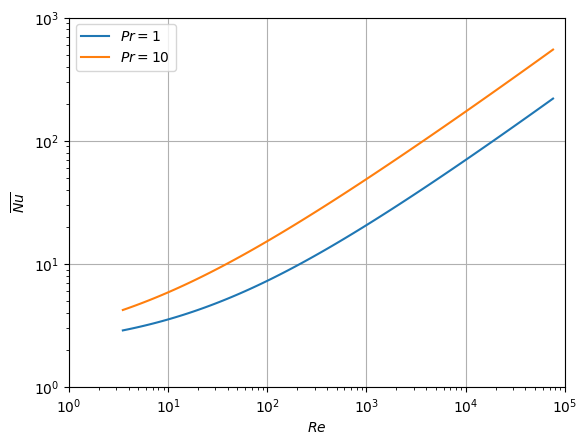

In [17]:
fig5, ax = plt.subplots()

Re = np.geomspace(3.5, 76000, 100)
Nu = np.empty_like(Re)

for Pr in [1e0, 1e1]:
    for i in range(Re.size):
        Nu[i] = Nu_sphere(Re[i], Pr, mur=1)
    ax.plot(Re, Nu, label=rf"$Pr={Pr:.0f}$")

ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$\overline{Nu}$")
ax.set_xlim(Re.min(), Re.max())
ax.set_xlim(1e0, 1e5)
ax.set_ylim(1e0, 1e3)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.legend(loc="best")

fig5.savefig("Nu_sphere.svg")

## Flat plate

### Nu_flatplate

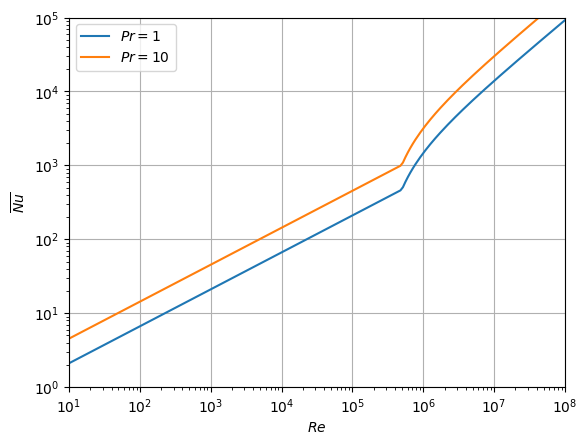

In [22]:
fig6, ax = plt.subplots()

Re = np.geomspace(1e1, 1e8, 200)
Nu = np.empty_like(Re)

for Pr in [1e0, 1e1]:
    for i in range(Re.size):
        Nu[i] = Nu_flatplate(Re[i], Pr)
    ax.plot(Re, Nu, label=rf"$Pr={Pr:.0f}$")

ax.set_xlabel(r"$Re$")
ax.set_ylabel(r"$\overline{Nu}$")
ax.set_xlim(Re.min(), Re.max())
ax.set_xlim(1e1, 1e8)
ax.set_ylim(1e0, 1e5)
ax.set_xscale("log")
ax.set_yscale("log")
ax.grid(True)
ax.legend(loc="best")

fig6.savefig("Nu_flatplate.svg")

## Diffusion

### uptake_sheet

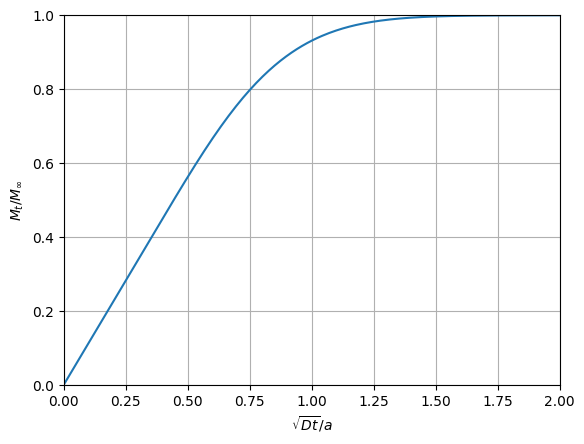

In [29]:
fig6, ax = plt.subplots()

D = 1.
a = 1.
t = np.linspace(0., 4., 200)
y = np.zeros_like(t)
for i in range(t.size):
    y[i] = uptake_sheet(t[i], a, D)

x = np.sqrt(D*t)/a 
ax.plot(x, y)

ax.set_xlabel(r"$\sqrt{Dt}/a$")
ax.set_ylabel(r"$M_t / M_{\infty}$")
ax.set_xlim(0, 2)
ax.set_ylim(0, 1)
ax.grid(True)

fig6.savefig("uptake_sheet.svg")

### uptake_sphere

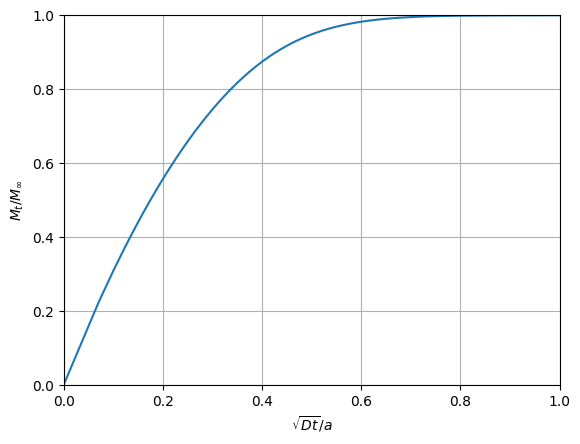

In [32]:
fig7, ax = plt.subplots()

D = 1.
a = 1.
t = np.linspace(0., 1., 200)
y = np.zeros_like(t)
for i in range(t.size):
    y[i] = uptake_sphere(t[i], a, D)

x = np.sqrt(D*t)/a 
ax.plot(x, y)

ax.set_xlabel(r"$\sqrt{Dt}/a$")
ax.set_ylabel(r"$M_t / M_{\infty}$")
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.grid(True)

fig7.savefig("uptake_sphere.svg")